In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
df=files.upload()

Saving Mall Customers.csv to Mall Customers.csv


In [ ]:
# The uploaded file name is 'Mall Customers.csv'
df = pd.read_csv('Mall Customers.csv')

df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [ ]:
display(df.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Education                 0
Marital Status            0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [ ]:
df.drop_duplicates()



,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40
...,...,...,...,...,...,...,...
195,196,F,35,High School,Married,120,79
196,197,F,45,High School,Unknown,126,28
197,198,M,32,Uneducated,Married,126,74
198,199,M,32,High School,Married,137,18


In [ ]:
print(df.columns.tolist())


['CustomerID', 'Gender', 'Age', 'Education ', 'Marital Status', 'Annual Income (k$)', 'Spending Score (1-100)']


In [ ]:
df.drop(columns=['Marital Status'],inplace=True)

In [ ]:
df.head()

,CustomerID,Gender,Age,Education,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,15,39
1,2,M,21,Graduate,15,81
2,3,F,20,Graduate,16,6
3,4,F,23,High School,16,77
4,5,F,31,Uneducated,17,40


In [ ]:
df=pd.get_dummies(df,columns=['Gender'])

In [ ]:
df.head()

,CustomerID,Age,Education,Annual Income (k$),Spending Score (1-100),Gender_F,Gender_M
0,1,19,High School,15,39,False,True
1,2,21,Graduate,15,81,False,True
2,3,20,Graduate,16,6,True,False
3,4,23,High School,16,77,True,False
4,5,31,Uneducated,17,40,True,False


In [ ]:
scaler=StandardScaler()
numeric_columns=['Age','Annual Income (k$)','Spending Score (1-100)']
df[numeric_columns]=scaler.fit_transform(df[numeric_columns])

*Univariant Analysis*

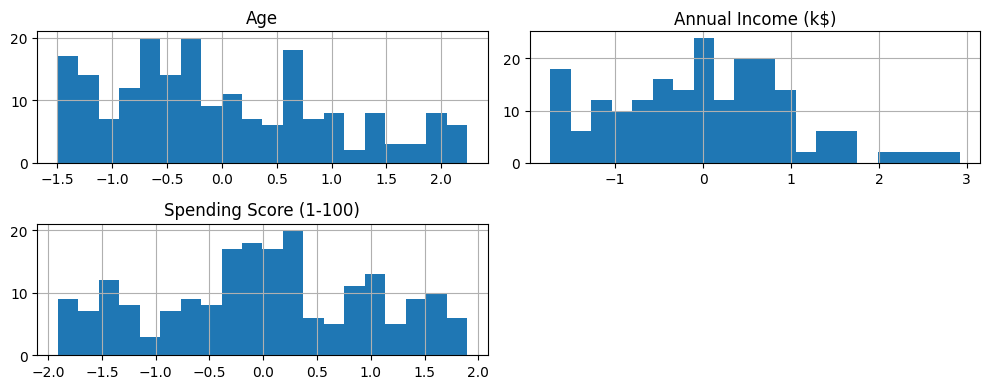

In [ ]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].hist(figsize=(10,4),bins=20)
plt.tight_layout()
plt.show()

*Bivariate Analysis*

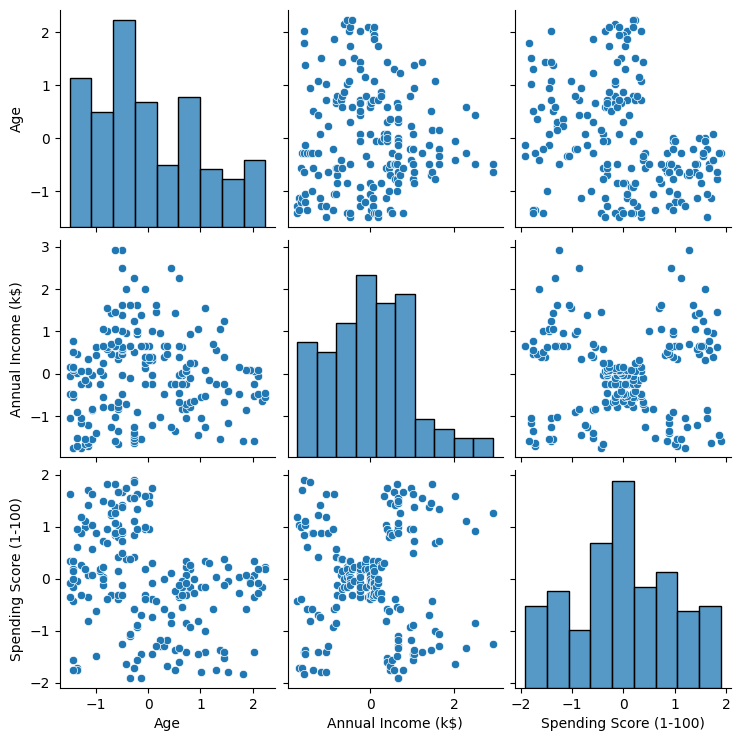

In [ ]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

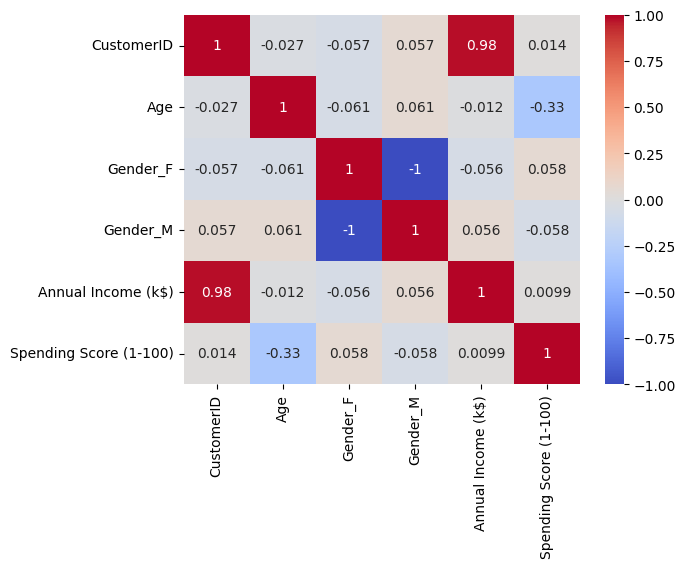

In [ ]:
corr=df[['CustomerID', 'Age','Gender_F','Gender_M', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

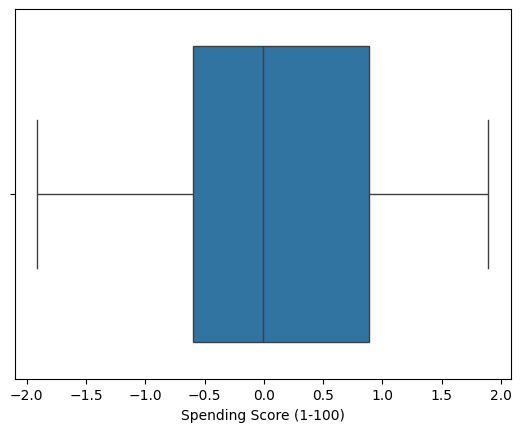

In [ ]:
sns.boxplot(x=df['Spending Score (1-100)'])
plt.show()

##**Cluster customers into segments**

In [ ]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]
#scale for equal weight (K-Means uses Euclidean distance)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

**Elbow Method**

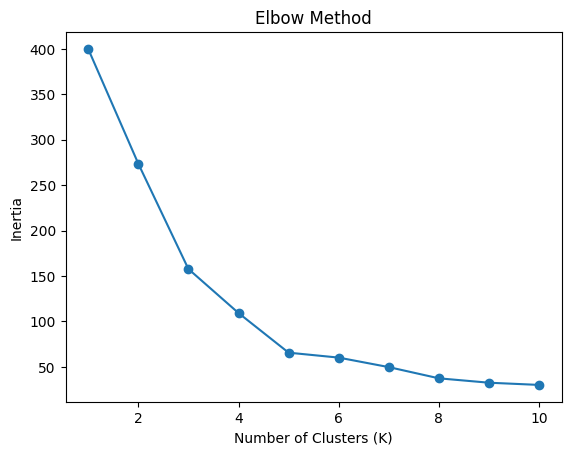

In [ ]:
inertia=[]
for k in range(1,11):
  km=KMeans(n_clusters=k,random_state=42)
  km.fit(X_scaled)
  inertia.append(km.inertia_)

plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
#Fit K-means
# Based on the Elbow Method, 5 clusters seems appropriate
km=KMeans(n_clusters=5,random_state=42, n_init=10) # Added n_init for robust centroid initialization
df['Cluster']=km.fit_predict(X_scaled)

# Map cluster labels to names
name_map={
    0:'Average Spenders',
    1:'High-Income High Spenders',
    2:'High-Income Low Spenders',
    3:'Low-Income Low Spenders',
    4:'Low-Income High Spenders'
}
df['Cluster_Name'] = df['Cluster'].map(name_map)

# Display the head of the dataframe with the new cluster information
display(df.head())

,CustomerID,Age,Education,Annual Income (k$),Spending Score (1-100),Gender_F,Gender_M,Cluster,Cluster_Name
0,1,-1.424569,High School,-1.738999,-0.434801,False,True,4,Low-Income High Spenders
1,2,-1.281035,Graduate,-1.738999,1.195704,False,True,2,High-Income Low Spenders
2,3,-1.352802,Graduate,-1.700830,-1.715913,True,False,4,Low-Income High Spenders
3,4,-1.137502,High School,-1.700830,1.040418,True,False,2,High-Income Low Spenders
4,5,-0.563369,Uneducated,-1.662660,-0.395980,True,False,4,Low-Income High Spenders


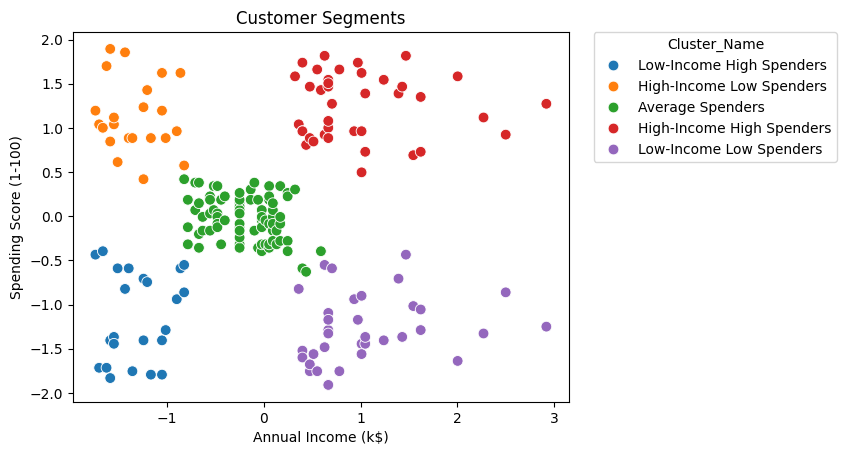

In [ ]:
sns.scatterplot(
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Cluster_Name',
                palette='tab10',
                data=df,
                s=60)
plt.legend(title='Cluster_Name',
           bbox_to_anchor=(1.05,1),
           loc='upper left',
           borderaxespad=0)
plt.title('Customer Segments')
plt.show()

In [ ]:


print(df.groupby('Cluster_Name')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

                           Annual Income (k$)  Spending Score (1-100)
Cluster_Name                                                         
Average Spenders                    -0.200913               -0.026456
High-Income High Spenders            0.991583                1.239503
High-Income Low Spenders            -1.329545                1.132178
Low-Income High Spenders            -1.307519               -1.136965
Low-Income Low Spenders              1.055003               -1.284439


In [ ]:
print(df.groupby('Cluster_Name')[['Spending Score (1-100)']].mean())

                           Spending Score (1-100)
Cluster_Name                                     
Average Spenders                        -0.026456
High-Income High Spenders                1.239503
High-Income Low Spenders                 1.132178
Low-Income High Spenders                -1.136965
Low-Income Low Spenders                 -1.284439


In [ ]:
#Fit DBSCAN
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.5,min_samples=5)
df['DBSCAN_Cluster']=db.fit_predict(X_scaled)

In [ ]:
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


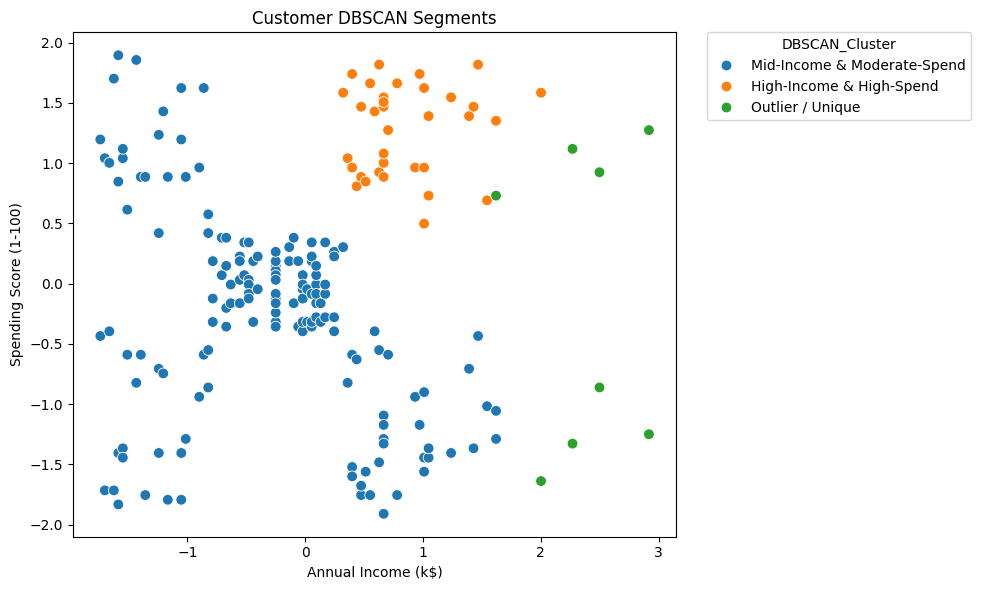

In [ ]:
db_name_map = {
    -1: 'Outlier / Unique',
     0: 'Mid-Income & Moderate-Spend',
     1: 'High-Income & High-Spend'
}
df['DBSCAN_Cluster_Name'] = df['DBSCAN_Cluster'].map(db_name_map)
plt.figure(figsize=(10,6))
sns.scatterplot(
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='DBSCAN_Cluster_Name',
                palette='tab10',
                data=df,
                s=60
)
plt.legend(title='DBSCAN_Cluster',
          bbox_to_anchor=(1.05,1),
           loc='upper left',
           borderaxespad=0)

plt.title('Customer DBSCAN Segments')
plt.tight_layout()
plt.show()

In [ ]:
print(df.groupby('DBSCAN_Cluster_Name')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

                             Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster_Name                                                    
High-Income & High-Spend               0.839073                1.265583
Mid-Income & Moderate-Spend           -0.308010               -0.275559
Outlier / Unique                       2.373757               -0.129082


In [ ]:
print(df.groupby('DBSCAN_Cluster_Name')[['Spending Score (1-100)']].mean())

                             Spending Score (1-100)
DBSCAN_Cluster_Name                                
High-Income & High-Spend                   1.265583
Mid-Income & Moderate-Spend               -0.275559
Outlier / Unique                          -0.129082


In [ ]:
import pickle
# save
pickle.dump(km, open('kmeans_model.pkl','wb'))

# load
loaded_model = pickle.load(open('kmeans_model.pkl','rb'))

In [ ]:
# save
pickle.dump(db, open('DBSCAN_model.pkl','wb'))

# load
loaded_model = pickle.load(open('DBSCAN_model.pkl','rb'))

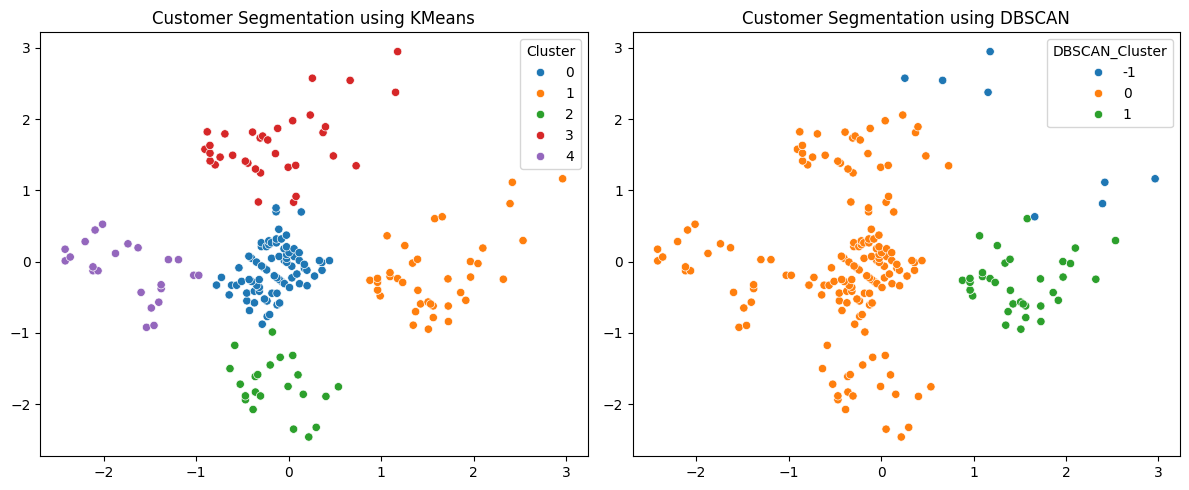

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting
fig,axes=plt.subplots(1,2,figsize=(12,5))

# KMeans scatter
sns.scatterplot(
    x=X_pca[:,0],y=X_pca[:,1],
    hue=df['Cluster'],palette="tab10",ax=axes[0],legend='full'
)
axes[0].set_title("Customer Segmentation using KMeans")

# DBSCAN scatter
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df['DBSCAN_Cluster'], palette="tab10", ax=axes[1], legend="full"
)
axes[1].set_title("Customer Segmentation using DBSCAN")

plt.tight_layout()
plt.show()